In [1]:
#scrapy 爬虫框架
    #爬虫框架是实现爬虫功能的一个软件结构和功能组件集合
    #爬虫框架是一个半成品,能够帮助用户实现专业网络爬虫
    #7个部分
        #spider,engine,item pipelines,engine,downloader,scheduler,
        #中间介模块:middleware
        #三个数据流
            #Engine,控制所有模块之间的数据流,根据条件触发控制
            #Downloader,根据请求下载网页
            #schduler,管理/调度爬取请求
            #downloader middleware,实施engine,scheduler和downloader之间用户可配置的控制,通过中间键的编写,修改,丢弃,新增请求或响应
            #spider,解析downloader返回的响应(response),产生爬取项(scraped item),产生额外的爬取请求(request)
            #item pipelines,以流水线方式处理sipder产生的爬取项,由一组操作顺序组成,类似流水线,每个操作是一个item pipeline类型
                #可能操作包括:清理\检验和查重爬取项中的HTML数据，将数据存储到数据库中．
            #spider Middleware,对请求和爬取项(request,scraped item)的再处理,修改\丢弃\新增请求和爬取项
            
            
                
            
            
        


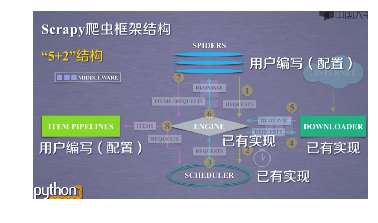

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as img

im1=img.imread('C:\\Users\\hzg0601\\Pictures\\scrapy2.png')
plt.imshow(im1)
plt.axis('off')
plt.show()


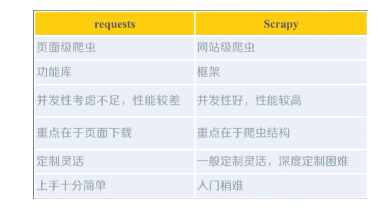

In [1]:
#requests vs. scrapy
    #两者都没有处理js,提交表单\应对验证码等功能(可扩展)
    #反扒网站需要慢速爬取
    #scapy框架适用于需要累积,不间断获取数据
    #定制程度很高的需求(不考虑规模),自搭框架,requests>scrapy
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img
im3=img.imread('C:\\Users\\hzg0601\\Pictures\\scrapy3.png')
plt.imshow(im3)
plt.axis('off')
plt.show()

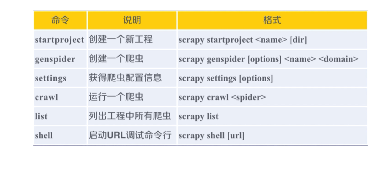

In [5]:
#scrapy是为持续运行设计的专业爬虫框架,提供操作的scrapy命令行
    #scrapy -h
    #命令行格式, scrapy <command> [option][args]
    #命令行(不是图形界面)更容易自动化,适合脚本控制
    
#scrapy 命令
    #startproject,创建一个新工程,scrapy startproject <name>[dir]
    #genspider,创建一个爬虫,scrapy genspider [options]
    #settings,获得爬虫信息,scrapy settings[options]
    #crawl,运行一个爬虫,scrapy crawl<spider>
    #list,列出工程中的所有爬虫,scrapy list
    #shell,启动URL调试命令行,scrapy shell[url]
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img

im4=img.imread('C:\\Users\\hzg0601\\Pictures\\scrapy4.png')
plt.imshow(im4)
plt.axis('off')
plt.show()


In [1]:
#建立工程和spider模板
#scrapy startproject BaiduStocks#命令行
#cd BaiduStocks
#scrapy genspider [例子,example example.com] stocks baidu.com

#scrapy crawl


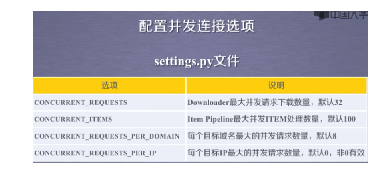

In [2]:
#优化,修改settings的并发控制
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img

im5=img.imread('C:\\Users\\hzg0601\\Pictures\\scrapy5.png')
plt.imshow(im5)
plt.axis('off')
plt.show()

In [ ]:
# -*- coding: utf-8 -*-
import scrapy
import re
##建立工程和spider模板
#scrapy startproject BaiduStocks#命令行
#cd BaiduStocks
#scrapy genspider [例子,example example.com] stocks baidu.com

##编写spider文件
#配置stocks.py文件
#修改对返回页面的处理
#修改对新增url爬取请求的处理

##配置pipeline文件

##修改settings.py

##scrapy crawl stocks 

class StocksSpider(scrapy.Spider):
    name = 'stocks'
    
    start_urls = ['http://quote.eastmoney.com/stocklist.html']#初始url链接

    def parse(self, response):
        for href in response.css('a::attrs(href)').extract():#提取a标签中的链接中href属性
            try:
                stock=re.findall(r'[s][hz]\d{6}',href)[0]#正则化获得列表
                url='https://gupiao.baidu.com/stock/'+stock+'.html'
                yield scrapy.Request(url,callback=self.parse_stock)#将url作为新的请求提交给scrapy,
                #yield 关键词将parse作为一个生成器,callback定义对应响应的处理函数
            except:
                continue
                
    def parse_stock(self, response):
        infoDict = {}
        stockInfo = response.css('.stock-bets')#获取s属性为stock-bets的标签
        name = stockInfo.css('.bets-name').extract()[0]#获取属性为bets-name的文本的第一个
        keyList = stockInfo.css('dt').extract()#获取所有名称为dt的标签的文本
        valueList = stockInfo.css('dd').extract()
        for i in range(len(keyList)):
            key = re.findall(r'>.*</dt>', keyList[i])[0][1:-5]#获取每一个条目名
            try:
                val = re.findall(r'\d+\.?.*</dd>', valueList[i])[0][0:-5]#获取每一个条目的值
            except:
                val = '--'
            infoDict[key]=val#更新条目与值

        infoDict.update(
            {'股票名称': re.findall('\s.*\(',name)[0].split()[0] + \
             re.findall('\>.*\<', name)[0][1:-1]})#更新股票名称
        yield infoDict
       
       
        


In [ ]:
# Define your item pipelines here
#
# Don't forget to add your pipeline to the ITEM_PIPELINES setting
# See: https://doc.scrapy.org/en/latest/topics/item-pipeline.html


class BaidustocksPipeline(object):
    def process_item(self, item, spider):
        return item

class BaidustocksInfoPipeline(object):
    def open_spider(self,spider):
        self.f=open('BaiduStockInfo.txt','w')
    def close_spider(self,spider):
        self.f.close()
    def process_item(self,item,spider):
        try:
            line=str(dict(item))+'\n'
            self.f.write(line)
        except:
            pass
        return item
    
        

In [ ]:
BOT_NAME = 'BaiduStocks'

SPIDER_MODULES = ['BaiduStocks.spiders']
NEWSPIDER_MODULE = 'BaiduStocks.spiders'

ROBOTSTXT_OBEY = True

ITEM_PIPELINES = {
    'BaiduStocks.pipelines.BaidustocksInfoPipeline': 300,
}